In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [149]:
#Import raw data 
bl_csv= pd.read_csv(r"raw_data.csv")
bl_csv.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [150]:
#Import validation data
bv_csv= pd.read_csv(r"validation.csv")
bv_csv.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [151]:
# Convert raw data to DataFrame
df = pd.DataFrame(data = bl_csv)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


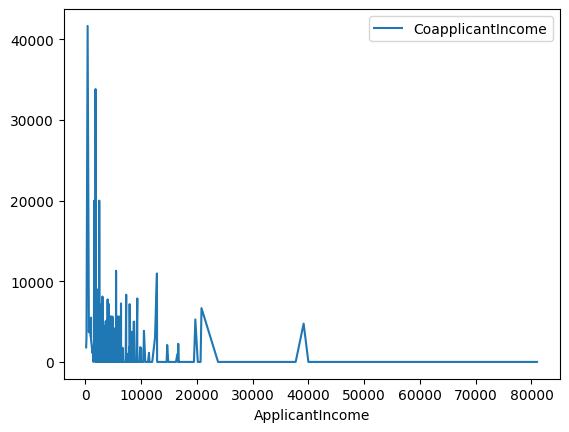

In [152]:
# Changed to line graph to better display data
(
    df.sort_values(by='ApplicantIncome', ascending=True)
).plot(
    kind='line', 
    x='ApplicantIncome', 
    y='CoapplicantIncome'
);

In [153]:
from scipy.stats import entropy

# Assuming df is your DataFrame
for col in df.columns:
    ln = col + ':'
    print(f'Entropy of {ln:<20}  {round(entropy(df[col].value_counts(normalize=True), base=np.e),7)}')

print(f'Entropy of {"Value_Counts:":<21} {round(entropy(df.value_counts(normalize=True), base=np.e),7)}')


Entropy of Loan_ID:              6.4199949
Entropy of Gender:               0.4808959
Entropy of Married:              0.6465812
Entropy of Dependents:           1.1291175
Entropy of Education:            0.5246727
Entropy of Self_Employed:        0.4065821
Entropy of ApplicantIncome:      6.1072364
Entropy of CoapplicantIncome:    3.7835116
Entropy of LoanAmount:           4.9438862
Entropy of Loan_Amount_Term:     0.6441789
Entropy of Credit_History:       0.4360061
Entropy of Property_Area:        1.0927896
Entropy of Loan_Status:          0.6212468
Entropy of Value_Counts:         6.1737861


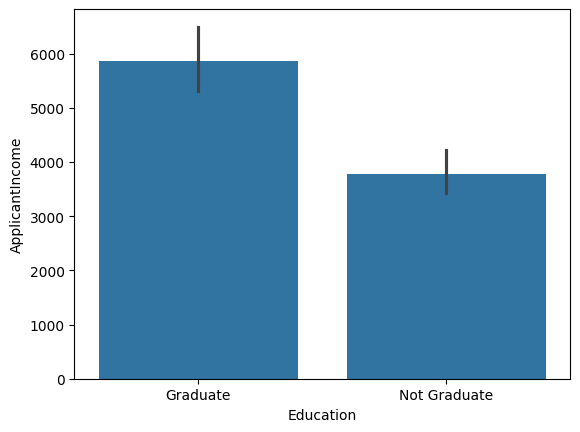

In [154]:
sns.barplot(data=df.sort_values(by='Loan_ID', ascending=True),x='Education',y='ApplicantIncome');

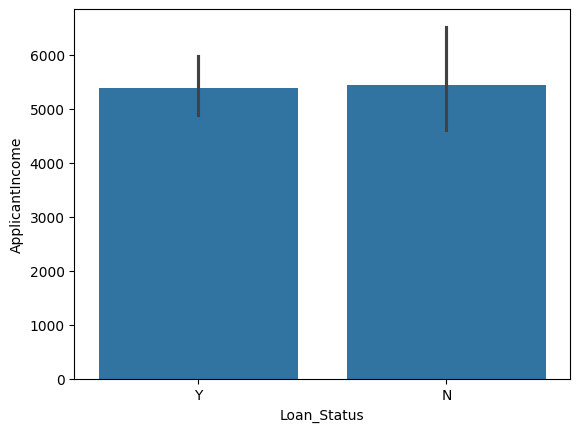

In [155]:
sns.barplot(data=df.sort_values(by='Loan_ID', ascending=True),x='Loan_Status',y='ApplicantIncome');

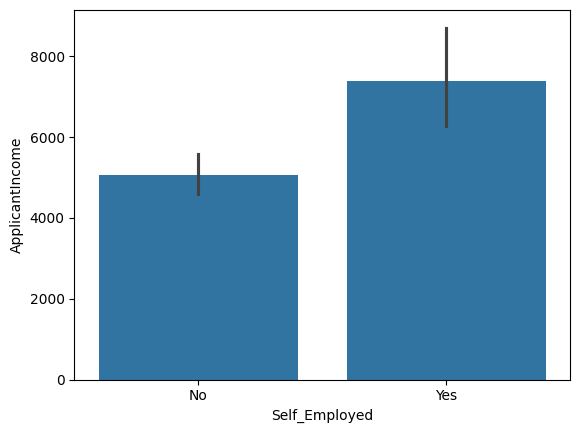

In [156]:
sns.barplot(data=df.sort_values(by='Loan_ID', ascending=True),x='Self_Employed',y='ApplicantIncome');

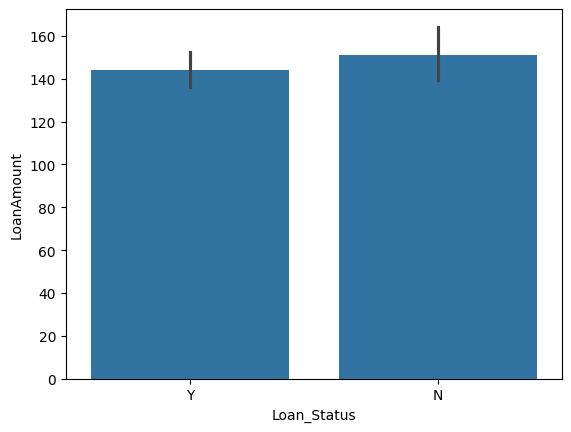

In [157]:
sns.barplot(data=df.sort_values(by='Loan_ID', ascending=True),x='Loan_Status',y='LoanAmount');

In [158]:
def pandas_entropy(column, base=None):
    vc = pd.Series(column).value_counts(normalize=True, sort=False)
    base = np.e if base is None else base
    return -(vc * np.log(vc)/np.log(base)).sum()

In [159]:
import pandas as pd
from scipy.stats import entropy

# Assuming df is your DataFrame
for col in df.columns:
    print(f'Entropy of {col}: {entropy(df[col].value_counts(normalize=True), base=np.e)}')

print(entropy(df.value_counts(normalize=True), base=np.e))


Entropy of Loan_ID: 6.41999492814714
Entropy of Gender: 0.48089588139333894
Entropy of Married: 0.6465811991072521
Entropy of Dependents: 1.1291174740741763
Entropy of Education: 0.5246726755960811
Entropy of Self_Employed: 0.4065820843521172
Entropy of ApplicantIncome: 6.107236436206865
Entropy of CoapplicantIncome: 3.783511600286371
Entropy of LoanAmount: 4.9438862051356125
Entropy of Loan_Amount_Term: 0.6441789434605332
Entropy of Credit_History: 0.43600607982675565
Entropy of Property_Area: 1.092789563649835
Entropy of Loan_Status: 0.6212467946739648
6.173786103901938


In [160]:
import pandas as pd
from scipy.stats import entropy

# Assuming df is your DataFrame
for col in df.columns:
    print(f'Entropy of {col}: {entropy(df[col].value_counts(normalize=True), base=np.e)}')

print(entropy(df.value_counts(normalize=True), base=np.e))


Entropy of Loan_ID: 6.41999492814714
Entropy of Gender: 0.48089588139333894
Entropy of Married: 0.6465811991072521
Entropy of Dependents: 1.1291174740741763
Entropy of Education: 0.5246726755960811
Entropy of Self_Employed: 0.4065820843521172
Entropy of ApplicantIncome: 6.107236436206865
Entropy of CoapplicantIncome: 3.783511600286371
Entropy of LoanAmount: 4.9438862051356125
Entropy of Loan_Amount_Term: 0.6441789434605332
Entropy of Credit_History: 0.43600607982675565
Entropy of Property_Area: 1.092789563649835
Entropy of Loan_Status: 0.6212467946739648
6.173786103901938


In [161]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [162]:
df["Gender"] = df["Gender"].apply(lambda x: 1 if x == "Male" else 0)
df["Married"] = df["Married"].apply(lambda x: 1 if x == "Yes" else 0)
df["Education"] = df["Education"].apply(lambda x: 1 if x == "Graduate" else 0)
df["Self_Employed"] = df["Self_Employed"].apply(lambda x: 1 if x == "Yes" else 0)

In [163]:
df[["Gender", "Married", "Education", "Self_Employed"]].head()

,Gender,Married,Education,Self_Employed
0,1,0,1,0
1,1,1,1,0
2,1,1,1,1
3,1,1,0,0
4,1,0,1,0


In [164]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and "target" is the target variable
# Drop the ID column
X = df.drop(["Loan_Status", "Loan_ID"], axis=1)
y = df["Loan_Status"]

# Convert the '3+' values to a numerical format

In [165]:
# Drop the ID column
X = df.drop(["Loan_Status", "Loan_ID"], axis=1)

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(5), object(4)
memory usage: 62.5+ KB


In [167]:
Ydf =df["Loan_Status"]
Ydf

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [168]:
Ydf =df["Loan_Status"]
if Ydf=="Y":
    Ydf

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().